# Review the Results of the NLP Pretrained Model

This model is very basic, but this folder shows you how to create an NLP pipeline with a pretrained model.

The .py file saved the results to a parquet that is stored in our container. We are reading it back here to review.

In [ ]:
spark

In [73]:
from pyspark.sql.functions import col, udf, size
from pyspark.sql.types import FloatType

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 78, Finished, Available, Finished)

In [74]:
workspace_default_storage_account = "projectgstoragedfb938a3e"
workspace_default_container = "azureml-blobstore-becc8696-e562-432e-af12-8a5e3e1f9b0f"
workspace_wasbs_base_url = f"wasbs://{workspace_default_container}@{workspace_default_storage_account}.blob.core.windows.net/"

# the parquet path again
nlp_sample_test_path = f"{workspace_wasbs_base_url}nlp_result_sample_submissions.parquet"

# Read the Parquet file back into a dataframe
nlp_sample_test = spark.read.parquet(nlp_sample_test_path)

# Show first 5 rows
nlp_sample_test.show(5)

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 79, Finished, Available, Finished)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|               spell|              lemmas|               stems|                 pos|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Hi, I hope this i...|[{document, 0, 85...|[{document, 0, 23...|[{token, 0, 1, Hi...|[{token, 0, 1, Hi...|[{token, 0, 1, Hi...|[{token, 0, 1, hi...|[{pos, 0, 1, NNP,...|
|33 male, i have d...|[{document, 0, 27...|[{document, 0, 68...|[{token, 0, 1, 33...|[{token, 0, 1, 33...|[{token, 0, 1, 33...|[{token, 0, 1, 33...|[{pos, 0, 1, CD, ...|
|           [removed]|[{document, 0, 8,...|[{document, 0, 8,...|[{token, 0, 8, [r...|[{token, 0, 8, [r...|[{token, 0, 8, [r...|[{token, 0, 8, [r...|[{

In [75]:
cancer_path = f"{workspace_wasbs_base_url}cancer_subreddit_sentiment.parquet"
# Read the Parquet file back into a dataframe
cancer_df = spark.read.parquet(cancer_path)

# Show first 5 rows
cancer_df.show(5)
cancer_df.printSchema()

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 80, Finished, Available, Finished)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|             checked|           sentiment|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|Check out Northsi...|[{document, 0, 26...|[{document, 0, 85...|[{token, 0, 4, Ch...|[{token, 0, 4, Ch...|[{sentiment, 0, 8...|
|I had something s...|[{document, 0, 22...|[{document, 0, 67...|[{token, 0, 0, I,...|[{token, 0, 0, I,...|[{sentiment, 0, 6...|
|That's an insulti...|[{document, 0, 22...|[{document, 0, 40...|[{token, 0, 5, Th...|[{token, 0, 5, th...|[{sentiment, 0, 4...|
|Yeah sorry, it wa...|[{document, 0, 84...|[{document, 0, 29...|[{token, 0, 3, Ye...|[{token, 0, 3, Ye...|[{sentiment, 0, 2...|
|I see my colorect...|[{document, 0, 65...|[{document, 0, 31...|[{token, 0, 0, I,...|[{token, 0, 0, I,..

In [76]:
from pyspark.sql import functions as F
df_flat = cancer_df.withColumn("sentiment_result", F.explode(F.col("sentiment"))) \
            .select("text", "sentiment_result.result")

# Show the results
df_flat.show(truncate=False)

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 81, Finished, Available, Finished)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
df_flat.show(5)
comments_row_count = df_flat.count()
comment_col_count = len(df_flat.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 82, Finished, Available, Finished)

+--------------------+--------+
|                text|  result|
+--------------------+--------+
|Check out Northsi...|negative|
|Check out Northsi...|negative|
|Check out Northsi...|positive|
|Check out Northsi...|negative|
|Check out Northsi...|positive|
+--------------------+--------+
only showing top 5 rows

shape of the comments dataframe is 41,883x2


In [78]:
cancer_df.printSchema()

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 83, Finished, Available, Finished)

root
 |-- text: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = true)
 |    |    |-- end: integer (nullable = true)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = true)
 |-- sentence: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = true)
 |    |    |-- end: integer (nullable = true)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 | 

In [79]:
cancer_sentiment_df = cancer_df.select("text","sentiment.result")


cancer_sentiment_df.show(5)


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 84, Finished, Available, Finished)

+--------------------+--------------------+
|                text|              result|
+--------------------+--------------------+
|Check out Northsi...|[negative, negati...|
|I had something s...|[positive, positi...|
|That's an insulti...|[positive, negati...|
|Yeah sorry, it wa...|[positive, negative]|
|I see my colorect...|[negative, positi...|
+--------------------+--------------------+
only showing top 5 rows



In [80]:
def calculate_sentiment_score(results):
    # Sentiment weights
    sentiment_weights = {"positive": 1, "negative": -1, "neutral": 0}
    # Map the results to scores, default to 0 if key not found
    scores = [sentiment_weights.get(sent, 0) for sent in results]
    # Calculate normalized score
    normalized_score = sum(scores) / len(scores) if scores else 0
    return normalized_score

# Register the UDF
sentiment_score_udf = udf(calculate_sentiment_score, FloatType())

# Add a new column for the weighted sentiment score
cancer_sentiment_df_with_scores = cancer_sentiment_df.withColumn(
    "weighted_score", sentiment_score_udf(col("result"))
)

cancer_sentiment_df_with_scores.show(truncate=False)


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 85, Finished, Available, Finished)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [81]:
from pyspark.sql.functions import when

# Add a column to label the sentiment
cancer_df = cancer_sentiment_df_with_scores.withColumn(
    "sentiment_label",
    when(col("weighted_score") > 0, "positive")
    .when(col("weighted_score") < 0, "negative")
    .otherwise("neutral")
)

cancer_df.select("text", "weighted_score", "sentiment_label").show(truncate=False)


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 86, Finished, Available, Finished)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 94, Finished, Available, Finished)

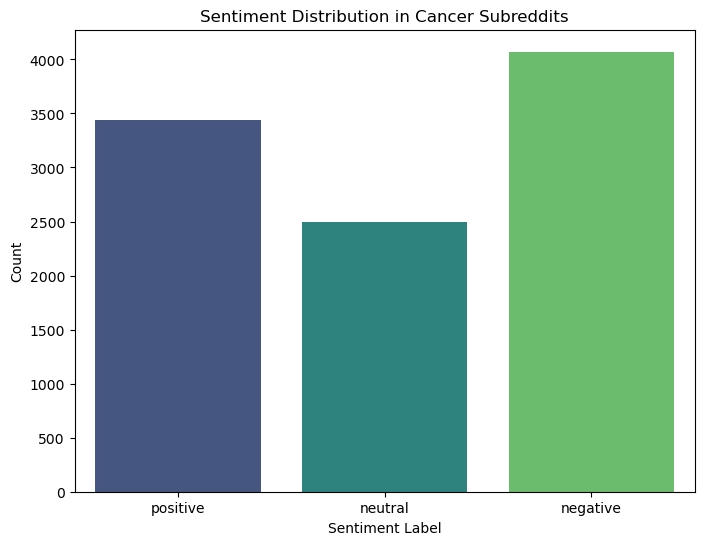

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each sentiment label
cancer_sentiment_counts = cancer_df.groupBy("sentiment_label").count()

# Convert the result to a pandas dataframe
cancer_sentiment_counts_pd = cancer_sentiment_counts.toPandas()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_label', y='count', data=cancer_sentiment_counts_pd, palette='viridis')

# Labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution in Cancer Subreddits')

plt.show()


In [84]:
not_cancer_path = f"{workspace_wasbs_base_url}not_cancer_subreddit_sentiment.parquet"
# Read the Parquet file back into a dataframe
not_cancer = spark.read.parquet(not_cancer_path)

# Show first 5 rows
not_cancer.show(5)
not_cancer.printSchema()

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 89, Finished, Available, Finished)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                text|            document|            sentence|               token|             checked|           sentiment|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|It’s like saying ...|[{document, 0, 71...|[{document, 0, 71...|[{token, 0, 3, It...|[{token, 0, 3, It...|[{sentiment, 0, 7...|
|    It was fake man.|[{document, 0, 15...|[{document, 0, 15...|[{token, 0, 1, It...|[{token, 0, 1, It...|[{sentiment, 0, 1...|
|No, you cannot co...|[{document, 0, 21...|[{document, 0, 34...|[{token, 0, 1, No...|[{token, 0, 1, No...|[{sentiment, 0, 3...|
|Wiser words have ...|[{document, 0, 34...|[{document, 0, 34...|[{token, 0, 4, Wi...|[{token, 0, 4, We...|[{sentiment, 0, 3...|
|Cara vai sem pres...|[{document, 0, 15...|[{document, 0, 15...|[{token, 0, 3, Ca...|[{token, 0, 3, Ca..

In [85]:
not_cancer_sentiment_df = not_cancer.select("text","sentiment.result")

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 90, Finished, Available, Finished)

In [86]:
# Add a new column for the weighted sentiment score
cancer_sentiment_df_with_scores = not_cancer_sentiment_df.withColumn(
    "weighted_score", sentiment_score_udf(col("result"))
)

# Show the results
cancer_sentiment_df_with_scores.show(truncate=False)

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 91, Finished, Available, Finished)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [87]:


# Add a column to label the sentiment
non_cancer_df = cancer_sentiment_df_with_scores.withColumn(
    "sentiment_label",
    when(col("weighted_score") > 0, "positive")
    .when(col("weighted_score") < 0, "negative")
    .otherwise("neutral")
)

# Show the results
non_cancer_df.select("text", "weighted_score", "sentiment_label").show(truncate=False)


StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 92, Finished, Available, Finished)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count occurrences of each sentiment label
non_cancer_sentiment_counts = non_cancer_df.groupBy("sentiment_label").count()

# Step 2: Convert the result to a pandas dataframe (for plotting)
non_cancer_sentiment_counts_pd = non_cancer_sentiment_counts.toPandas()

# Step 3: Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_label', y='count', data=non_cancer_sentiment_counts_pd, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution (Positive, Negative, Neutral)')

# Show the plot
plt.show()

StatementMeta(ba5e360d-f184-47a0-9859-76b5031b79e3, 41, 93, Finished, Available, Finished)

AnalysisException: Column 'sentiment_label' does not exist. Did you mean one of the following? [text, weighted_score, result];
'Aggregate ['sentiment_label], ['sentiment_label, count(1) AS count#1747L]
+- Project [text#1649, result#1687, calculate_sentiment_score(result#1687)#1690 AS weighted_score#1691]
   +- Project [text#1649, sentiment#1654.result AS result#1687]
      +- Relation [text#1649,document#1650,sentence#1651,token#1652,checked#1653,sentiment#1654] parquet


In [ ]:
# Count occurrences of each sentiment label for cancer and non-cancer patients
cancer_sentiment_counts = cancer_df.groupBy("sentiment_label").count()
non_cancer_sentiment_counts = non_cancer_df.groupBy("sentiment_label").count()

# Convert to Pandas for plotting
cancer_sentiment_counts_pd = cancer_sentiment_counts.toPandas()
non_cancer_sentiment_counts_pd = non_cancer_sentiment_counts.toPandas()

# Merge the data
sentiment_comparison_df = cancer_sentiment_counts_pd.merge(
    non_cancer_sentiment_counts_pd,
    on='sentiment_label',
    how='outer',
    suffixes=('_cancer', '_non_cancer')
).fillna(0)

sentiment_comparison_df

In [ ]:
# Creating a contingency table for Chi-square test
contingency_table = sentiment_comparison_df[['count_cancer', 'count_non_cancer']].values
contingency_table

In [ ]:
from scipy.stats import chi2_contingency

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies: \n{expected}")

In [ ]:
# Plotting sentiment distribution for cancer and non-cancer patients
plt.figure(figsize=(10, 6))

# Plot for Cancer Patients
sns.barplot(x='sentiment_label', y='count_cancer', data=sentiment_comparison_df, color='blue', label='Cancer Patients')

# Plot for Non-Cancer Patients
sns.barplot(x='sentiment_label', y='count_non_cancer', data=sentiment_comparison_df, color='red', label='Non-Cancer Patients')

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution: Cancer vs Non-Cancer Patients')
plt.legend()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Plot for Cancer Patients
sns.barplot(
    x='sentiment_label', y='count_cancer', data=sentiment_comparison_df,
    color='blue', label='Cancer Patients', alpha=0.7, dodge=True
)

# Plot for Non-Cancer Patients
sns.barplot(
    x='sentiment_label', y='count_non_cancer', data=sentiment_comparison_df,
    color='red', label='Non-Cancer Patients', alpha=0.7, dodge=True
)

# Add labels and title
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Sentiment Distribution: Cancer vs Non-Cancer Patients')

# Add the legend
plt.legend()

# Show plot
plt.show()
